# logistics regression 

In [ ]:
# when the outcome is binary

In [1]:
# sigmoid(x) = 1/(1+e^(-x))

In [1]:
import pandas as pd
import numpy as np

In [2]:
ttrain = pd.read_csv("train.csv")
ttest = pd.read_csv("test.csv")

In [3]:
ttest.shape

(418, 11)

In [4]:
ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
ttrain.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
ttest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
ttrain["cabinbooked"] = ttrain["Cabin"].apply(lambda x : 0 if pd.isna(x) else 1)
ttest["cabinbooked"] = ttest["Cabin"].apply(lambda x : 0 if pd.isna(x) else 1)

In [8]:
ttrain.drop(columns = ["PassengerId","Cabin","Name","Ticket"],inplace=True)
ttest.drop(["PassengerId","Cabin","Name","Ticket"],axis = 1 , inplace=True)

In [9]:
ttrain.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'cabinbooked'],
      dtype='object')

In [10]:
ttest.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'cabinbooked'],
      dtype='object')

In [11]:
ttrain.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

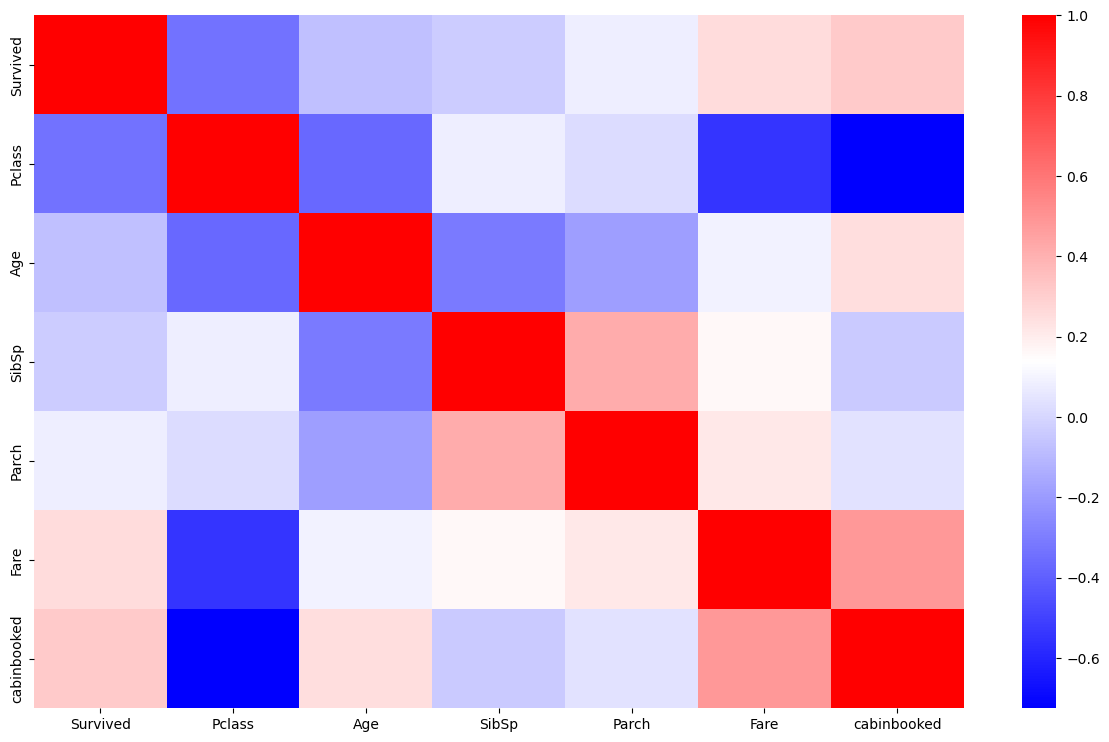

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,9))
sns.heatmap(ttrain.corr(),cmap = 'bwr')
plt.show()

In [13]:
# ttrain["Age"].fillna(ttrain.Age.median(),inplace = True)
# ttest["Age"].fillna(ttrain.Age.median(),inplace = True)
ttrain["Age"].fillna(ttrain.groupby('Sex')['Age'].transform('median'),inplace = True)
ttest["Age"].fillna(ttest.groupby('Sex')['Age'].transform('median'),inplace = True)

In [15]:
ttrain["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [6]:
ttrain.Embarked.fillna('S',inplace=True)

In [7]:
ttest["Fare"].fillna(ttest["Fare"].median(),inplace = True)

In [18]:
ttest.isna().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
cabinbooked    0
dtype: int64

In [19]:
ttrain.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [14]:
ttrain = pd.get_dummies(ttrain,columns = ["Sex","Embarked"],drop_first = True)
ttest = pd.get_dummies(ttest,columns = ["Sex","Embarked"],drop_first = True)

In [21]:
ttrain.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'cabinbooked',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [22]:
ttest.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'cabinbooked', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler 

In [24]:
scaler = StandardScaler()
ttrain[["Age","Fare"]] = scaler.fit_transform(ttrain[["Age","Fare"]])
ttest[["Age","Fare"]] = scaler.transform(ttest[["Age","Fare"]])

In [26]:
ttrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,cabinbooked,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.565736,1,0,-0.502445,0,1,0,1
1,1,1,0.663861,1,0,0.786845,1,0,0,0
2,1,3,-0.258337,0,0,-0.488854,0,0,0,1
3,1,1,0.433312,1,0,0.420730,1,0,0,1
4,0,3,0.433312,0,0,-0.486337,0,1,0,1


In [27]:
ttest.head()

,Pclass,Age,SibSp,Parch,Fare,cabinbooked,Sex_male,Embarked_Q,Embarked_S
0,3,0.394887,0,0,-0.490783,0,1,1,0
1,3,1.355510,1,0,-0.507479,0,0,0,1
2,2,2.508257,0,0,-0.453367,0,1,1,0
3,3,-0.181487,0,0,-0.474005,0,1,0,1
4,3,-0.565736,1,1,-0.401017,0,0,0,1


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_model = LogisticRegression()

In [30]:
x_train = ttrain.drop(columns = ["Survived"])
y_train = ttrain.Survived

In [31]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [32]:
pred = log_model.predict(x_train)

In [33]:
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, roc_curve, RocCurveDisplay,auc

In [35]:
confusion_matrix(y_pred = pred , y_true = y_train)

array([[471,  78],
       [ 99, 243]], dtype=int64)

In [36]:
accuracy_score(y_pred = pred , y_true = y_train)

0.8013468013468014

In [37]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [43]:
precision_score(y_pred=pred, y_true=y_train)

0.7570093457943925

In [44]:
recall_score(y_pred=pred, y_true=y_train)

0.7105263157894737

In [45]:
fpr, tpr, thresholds = roc_curve(y_score=pred, y_true=y_train)
roc_auc = auc(fpr, tpr)

In [47]:
print(roc_auc)

0.7842249065286166


In [52]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')

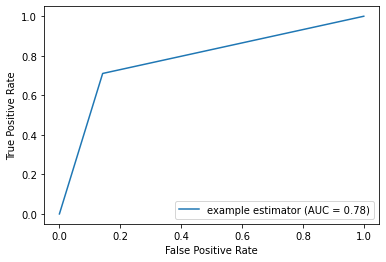

In [55]:
display.plot()

# feature engineering

In [14]:
import pandas as pd  
import numpy as np

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
df_digits = pd.read_csv("trainpca.csv")
# df_digits = pd.read_csv('F:/simplilearn/machine learning/Machine Learning Advanced Certification _ Amit K Kumar _ Jan 08th - Feb 12th/Day 4 Feature Engineering/trainpca.csv')

In [17]:
df_digits.shape

(42000, 785)

In [18]:
df_digits.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [19]:
df_digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_digits['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [21]:
x = df_digits.drop(['label'],axis=  1)
y = df_digits.label

In [22]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

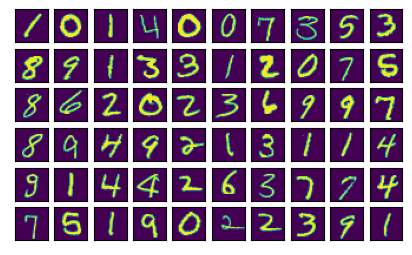

In [26]:
plt.figure(figsize=(5,3))
for i in range(0,60) :
    plt.subplot(6,10,i+1)
    mat_data = x.iloc[i].values.reshape(28,28)
    plt.imshow(mat_data)
    plt.xticks([])
    plt.yticks([])

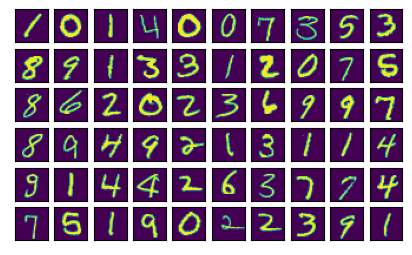

In [32]:
# plotting same but changing the reshape pattern
plt.figure(figsize=(5,3))
for i in range(0,60) :
    plt.subplot(6,10,i+1)
    mat_data = x.iloc[i].values.reshape(28,-1)
    plt.imshow(mat_data)
    plt.xticks([])
    plt.yticks([])

In [101]:
y[0:10]

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

In [102]:
y[10:20]

10    8
11    9
12    1
13    3
14    3
15    1
16    2
17    0
18    7
19    5
Name: label, dtype: int64

In [104]:
x.iloc[0,:].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 12345)

In [123]:
x_train.shape

(33600, 784)

In [140]:
x_test.shape

(8400, 784)

In [127]:
from sklearn.linear_model import LogisticRegression

In [129]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [130]:
y_predict = lr_model.predict(x_test)

In [131]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [141]:
cm = confusion_matrix(y_predict ,y_test)
print(cm)

[[826   0   5   2   2  11   8   2   9   4]
 [  0 902   6   2   6   2   0   3  13   3]
 [  7   2 735  31   5   9  12  17  10   3]
 [  1   6  19 814   1  30   3   4  33  12]
 [  2   0  11   1 741  14   5   9   4  26]
 [  8   2   2  18   0 640   7   2  25   4]
 [  9   0   7   2   7  20 775   0   5   0]
 [  3   0   5   6   3   9   1 765   2  27]
 [  6   8  21  20   9  27   2   6 722  10]
 [  0   1   2   8  30  11   1  36   5 748]]


In [142]:
accuracy = accuracy_score(y_predict,y_test)
print(accuracy)

0.9128571428571428


In [143]:
from sklearn.decomposition import PCA

In [144]:
pca = PCA(n_components = 0.95)

In [145]:
pca.fit(x_train)

PCA(n_components=0.95)

In [147]:
pca.n_components_

153

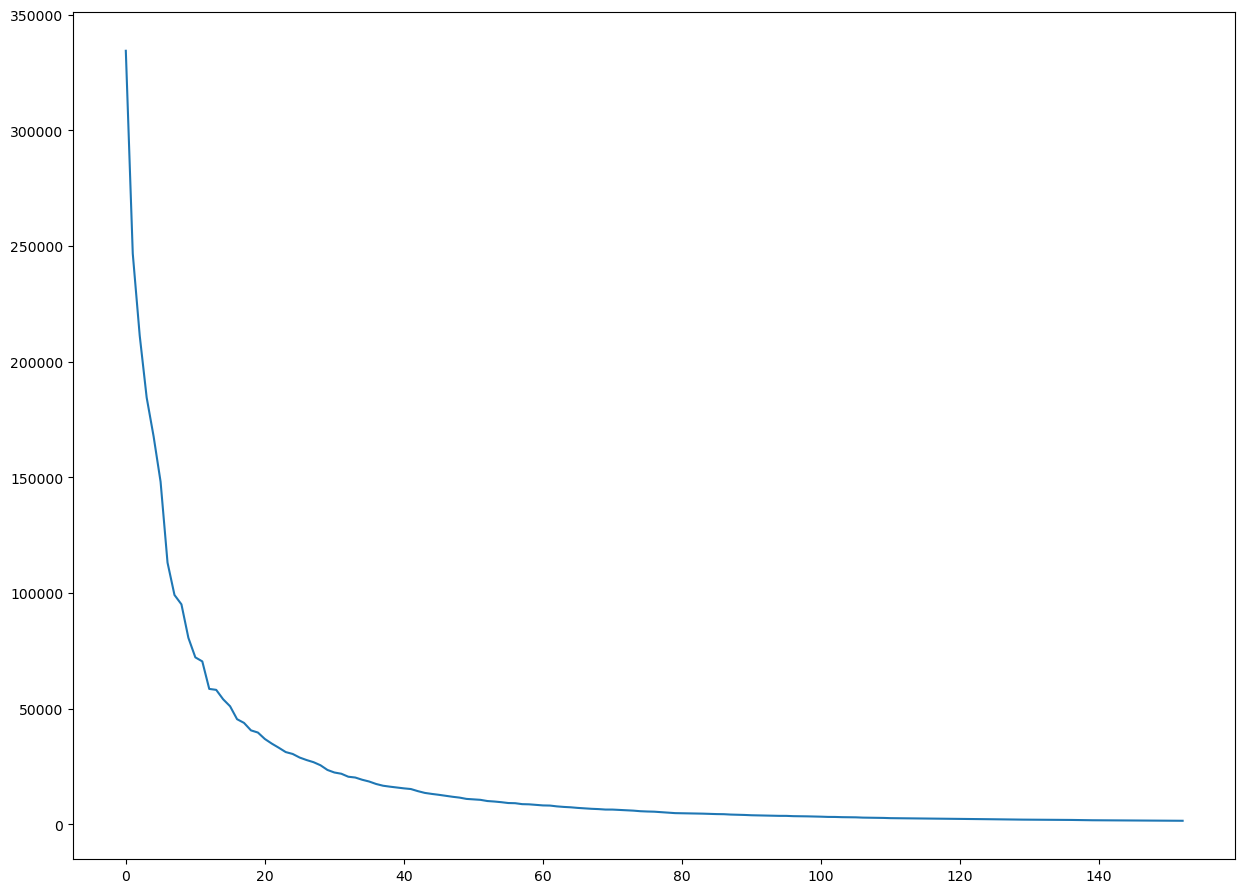

In [183]:
# reset plt.style.use by      plt.rcdefaults()
plt.figure(figsize = (15,11))
sns.lineplot(data = pca.explained_variance_)
plt.show()

In [184]:
pca.explained_variance_ratio_

array([0.09735221, 0.07182856, 0.0615057 , 0.05371467, 0.04881588,
       0.04312395, 0.03294168, 0.02887273, 0.02769591, 0.02348024,
       0.02102349, 0.02051618, 0.0170536 , 0.01693318, 0.01574795,
       0.01486596, 0.01324331, 0.01277607, 0.01183638, 0.01156167,
       0.01075005, 0.01016728, 0.00965123, 0.00910475, 0.00886799,
       0.00841674, 0.00810132, 0.00783283, 0.00744561, 0.00685598,
       0.00653408, 0.00637796, 0.00600197, 0.00590223, 0.00562079,
       0.00539918, 0.00508995, 0.00487002, 0.00475047, 0.00464652,
       0.00453923, 0.00445363, 0.00419013, 0.00396761, 0.00384064,
       0.00372987, 0.00359905, 0.00347938, 0.00337463, 0.00321128,
       0.00315236, 0.00309479, 0.00294484, 0.00288262, 0.00280009,
       0.00269323, 0.00267106, 0.00255265, 0.00252952, 0.00245831,
       0.00239195, 0.0023741 , 0.00227091, 0.00220245, 0.00215489,
       0.00207921, 0.00202057, 0.00196527, 0.0019286 , 0.00187072,
       0.00186886, 0.00182387, 0.00176718, 0.00173576, 0.00166

In [185]:
pca= PCA(n_components = 100)

In [187]:
# for scaling and PCA , apply fit_transform on x_train and only transform on x_test

x_train_pca = pca.fit_transform(x_train)
print(x_train_pca.shape)

x_test_pca = pca.transform(x_test)
print(x_test_pca.shape)

(33600, 100)
(8400, 100)


In [193]:
# knowing how much variance 100 components give
np.sum(pca.explained_variance_ratio_)

0.9148331937173362

In [191]:
pca.n_components_

100

In [199]:
pca_lr_model = LogisticRegression()
pca_lr_model.fit(x_train_pca,y_train)

LogisticRegression()

In [209]:
y_pca_test_pred = pca_lr_model.predict(x_test_pca)

In [210]:
confusion_matrix(y_pred = y_pca_test_pred,y_true = y_test)

array([[831,   0,   4,   0,   4,   7,  11,   2,   3,   0],
       [  0, 896,   2,   2,   0,   7,   1,   2,  10,   1],
       [  2,  11, 730,  14,  13,   3,   6,   8,  19,   7],
       [  2,   7,  24, 807,   1,  28,   4,  10,  12,   9],
       [  2,   8,   6,   1, 736,   0,   8,   4,   5,  34],
       [ 14,   5,   8,  23,  15, 649,  21,   8,  15,  15],
       [  6,   1,   4,   0,  10,  10, 783,   0,   0,   0],
       [  1,  10,  11,   0,   9,   2,   1, 771,   1,  38],
       [  8,  27,  11,  29,  10,  26,   8,   3, 699,   7],
       [  5,   6,   3,  15,  22,   5,   0,  21,   7, 753]], dtype=int64)

In [211]:
accuracy_score(y_pred = y_pca_test_pred,y_true = y_test)

0.9113095238095238

# linear discriminant analysis

In [228]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [18]:
from mlxtend.data import iris_data

In [19]:
from mlxtend.preprocessing import standardize

In [20]:
from mlxtend.feature_extraction import LinearDiscriminantAnalysis

In [21]:
x,y  = iris_data()

In [22]:
type(x)

numpy.ndarray

In [23]:
print(type(y))

<class 'numpy.ndarray'>


In [24]:
print(x.shape)

(150, 4)


In [25]:
print(y.shape)

(150,)


In [26]:
x[0]

array([5.1, 3.5, 1.4, 0.2])

In [32]:
x = standardize(x)

In [33]:
lda = LinearDiscriminantAnalysis(n_discriminants = 2)

In [34]:
lda.fit(x,y)
x_lda = lda.transform(x)

In [35]:
print(x_lda[0])

[-1.78399213+0.j -0.02138789+0.j]


In [37]:
type(x)

numpy.ndarray

In [38]:
x.shape

(150, 4)

# LDA homework

In [12]:
import pandas as pd
import numpy as np
a = pd.read_csv("trainpca.csv")

In [13]:
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import LinearDiscriminantAnalysis

In [14]:
a.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
a.shape

(42000, 785)

In [16]:
x  = a.drop("label",axis = 1)
y = a["label"]

In [17]:
print(x.columns)

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [18]:
x.shape

(42000, 784)

In [19]:
y.shape

(42000,)

In [20]:
x = standardize(x)

In [21]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0


In [22]:
lda = LinearDiscriminantAnalysis(n_discriminants = 2)

In [ ]:
lda.fit(x,y)

# LDA USING Sklearn library

In [1]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as ld
from sklearn.preprocessing import StandardScaler as sc

a = pd.read_csv('trainpca.csv')
x = a.drop(columns = ['label'])
y = a.label

# scale= sc()
# x = scale.fit_transform(x)

# lda  = ld(n_components=5)
# xld = lda.fit_transform(x,y)

# xld

In [3]:
y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [4]:
pd.DataFrame[(xld)[0,1]].corr()

,0,1,2,3,4
0,1.000000e+00,-1.199720e-15,-1.487844e-15,-1.470276e-15,1.820094e-15
1,-1.199720e-15,1.000000e+00,-1.948087e-15,2.096338e-16,-4.591235e-15
2,-1.487844e-15,-1.948087e-15,1.000000e+00,-8.851691e-16,-2.011987e-15
3,-1.470276e-15,2.096338e-16,-8.851691e-16,1.000000e+00,2.236948e-15
4,1.820094e-15,-4.591235e-15,-2.011987e-15,2.236948e-15,1.000000e+00


# decision tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
animals = pd.read_csv("horse.csv")

In [3]:
animals.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [4]:
animals.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [5]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [6]:
animals.age.value_counts()

adult    275
young     24
Name: age, dtype: int64

In [7]:
animals["lesion_1"].dtype

dtype('int64')

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imp_num = SimpleImputer(missing_values = np.NaN,strategy = 'median')
imp_cat = SimpleImputer(missing_values = np.NaN,strategy = 'most_frequent')

In [10]:
animals.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [30]:
cat_ = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux','rectal_exam_feces', 'abdomen','abdomo_appearance','outcome', 'surgical_lesion', 'cp_data']
num_ = ['hospital_number', 'rectal_temp', 'pulse','respiratory_rate','nasogastric_reflux_ph','packed_cell_volume', 'total_protein','abdomo_protein','lesion_1', 'lesion_2','lesion_3']

In [12]:
animals[cat_] = imp_cat.fit_transform(animals[cat_])
animals[num_] = imp_num.fit_transform(animals[num_])

In [13]:
animals.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [14]:
target = animals["outcome"]

In [15]:
target.head()

0          died
1    euthanized
2         lived
3          died
4          died
Name: outcome, dtype: object

In [16]:
target.unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [17]:
animals.drop(columns="outcome",inplace = True)

In [18]:
animals.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data'],
      dtype='object')

In [19]:
animals.shape

(299, 27)

In [23]:
animals = pd.get_dummies(columns = cat_.remove('outcome'),data= animals,drop_first = True)

In [25]:
animals.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes
0,530101.0,38.5,66.0,28.0,5.0,45.0,8.4,2.3,11300.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,534817.0,39.2,88.0,20.0,5.0,50.0,85.0,2.0,2208.0,0.0,...,0,0,0,0,0,1,1,0,0,0
2,530334.0,38.3,40.0,24.0,5.0,33.0,6.7,2.3,0.0,0.0,...,0,1,0,0,1,0,1,0,0,1
3,5290409.0,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208.0,0.0,...,0,0,0,0,0,0,0,1,1,1
4,530255.0,37.3,104.0,35.0,5.0,74.0,7.4,2.3,4300.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
animals.drop(["hospital_number"],axis = 1,inplace = True)

In [30]:
from sklearn.preprocessing import LabelEncoder
x,y = animals.values , target.values

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

In [32]:
y[0:5]

array([0, 1, 2, 0, 0])

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state  = 12345)

In [35]:
label_encoder.classes_

array(['died', 'euthanized', 'lived'], dtype=object)

In [36]:
target[0:10]

0          died
1    euthanized
2         lived
3          died
4          died
5         lived
6         lived
7          died
8    euthanized
9         lived
Name: outcome, dtype: object

In [56]:
y[0:10]

array([0, 1, 2, 0, 0, 2, 2, 0, 1, 2])

In [171]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [172]:
print(x_train.shape)

(239, 50)


In [173]:
classifier = DecisionTreeClassifier()

In [174]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [175]:
y_pred = classifier.predict(x_test)

In [176]:
from sklearn.metrics import accuracy_score as acs , confusion_matrix as cm

In [177]:
acs(y_pred = y_pred , y_true = y_test)

0.5833333333333334

In [178]:
cm(y_pred = y_pred , y_true = y_test)

array([[ 9,  4,  3],
       [ 3,  1,  6],
       [ 5,  4, 25]], dtype=int64)

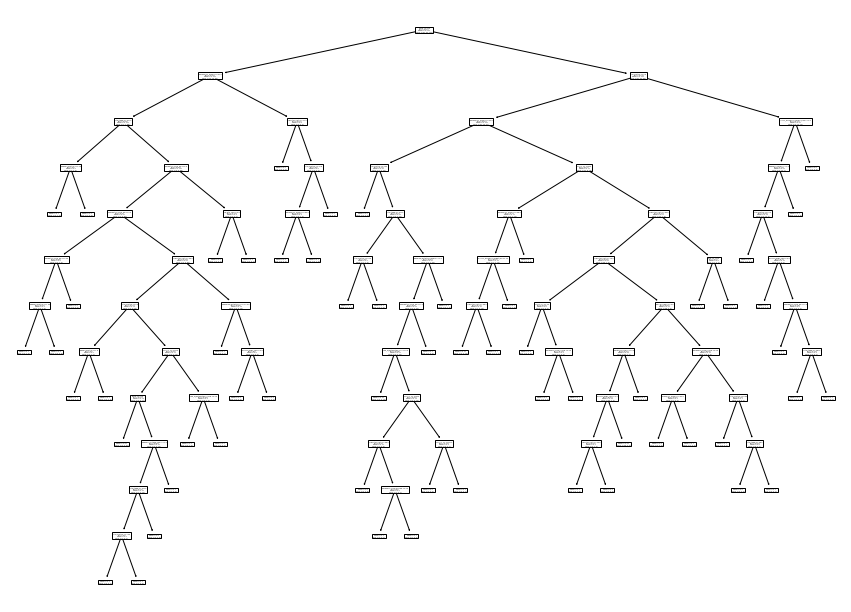

In [151]:
plt.figure(figsize=(15,11))
plot_tree(classifier,feature_names = animals.columns)
plt.show()

# pruned trees

In [152]:
classifier_pruned = DecisionTreeClassifier(max_depth = 3,ccp_alpha = 0.02,min_samples_split  = 5)

In [153]:
classifier_pruned.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, max_depth=3, min_samples_split=5)

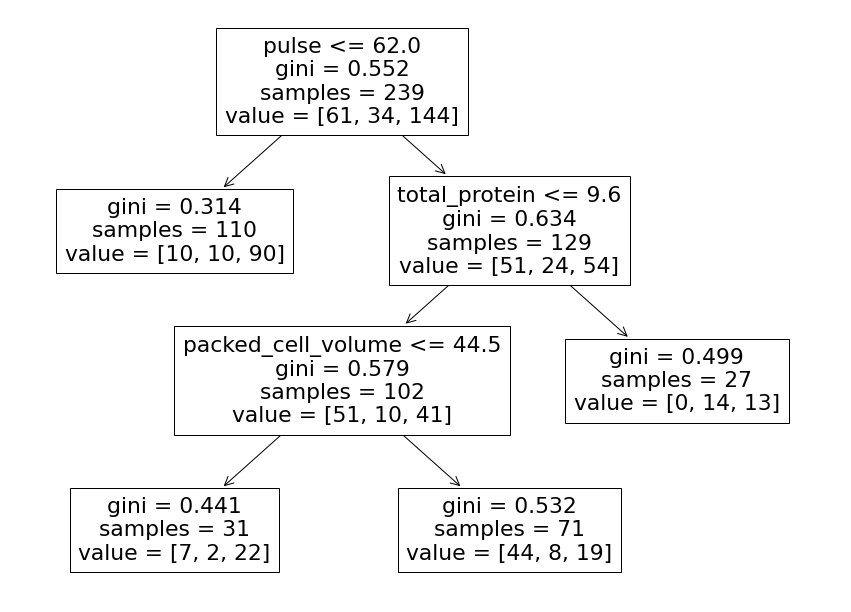

In [154]:
plt.figure(figsize = (15,11))
plot_tree(classifier_pruned,feature_names = animals.columns)
plt.show()

In [155]:
z = classifier_pruned.predict(x_test)

In [156]:
acs(y_pred = z , y_true = y_test)

0.5666666666666667

In [157]:
cm(y_pred = z , y_true = y_test)

array([[ 8,  0,  8],
       [ 4,  4,  2],
       [ 7,  5, 22]], dtype=int64)

In [164]:
# using only max_depths parameter

In [165]:
classifier_pruned = DecisionTreeClassifier(max_depth = 3)

In [166]:
classifier_pruned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

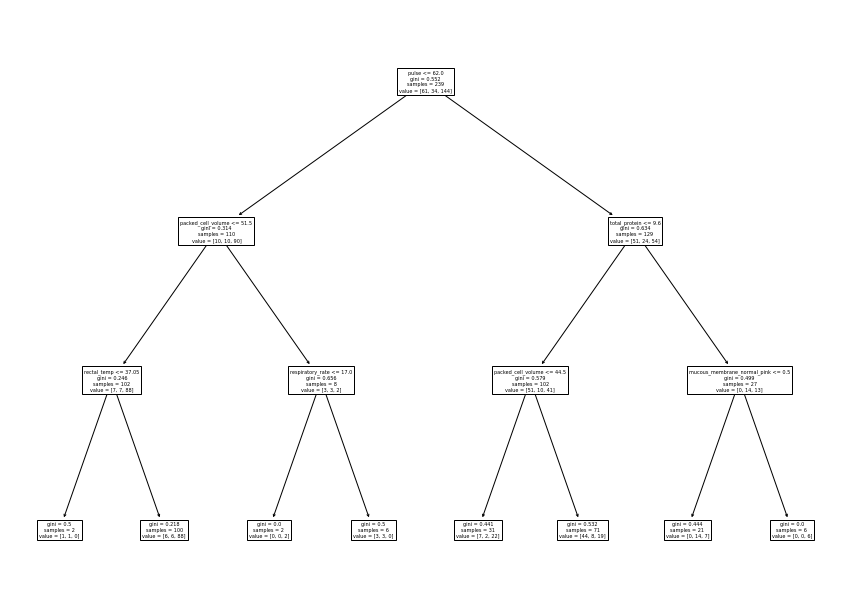

In [167]:
plt.figure(figsize = (15,11))
plot_tree(classifier_pruned,feature_names = animals.columns)
plt.show()

In [168]:
z = classifier_pruned.predict(x_test)

In [169]:
acs(y_pred = z , y_true = y_test)

0.6

In [170]:
cm(y_pred = z , y_true = y_test)

array([[10,  0,  6],
       [ 4,  2,  4],
       [ 8,  2, 24]], dtype=int64)

# random forest

In [179]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier()

In [180]:
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acs(y_pred = y_pred , y_true = y_test)

0.6666666666666666

In [181]:
# pruning can be donne to decision tree classifier aand random forest classifier
# pruning is especially done when there is overfiting of data
# overfitting meansto whe the diffenrence  between the accuracy of prediction on train set vs test set is too large 
# simply stating as acuracy of train set is too high and accuracy on test set is no where close to it